<a href="https://colab.research.google.com/github/Musungu-Maureen/trial/blob/main/Maureen_Musungu_IP2_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question



## a)Speficying the data analytic question

Which individuals are most likely to have or use a bank account in Kenya, Rwanda, Uganda and Tanzania?

## b) Metric for Success

The success criteria is to find the individuals who are most likely to have bank accounts in the given countries. 

## c) Understanding the Context

The context is on a typical normal household in the countries mentioned.

## d)Data Relevance

The data availed is relevant for use in this study. 

# 2. Reading the Data

In [ ]:
## importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Loading the data from the source
df = pd.read_csv('/content/Financial Dataset.csv')
df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# 3. Checking the Data

In [ ]:

# Determining number of records
df.shape

(23524, 13)

In [ ]:
## Previewing the top of our dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
## Previwing the bottom of our dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
## Checking the column datatypes
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# 4. Tidying the Dataset

In [ ]:
#Renaming the columns
df_2 = df.rename(columns = {'uniqueid': 'unique_ID', 'The relathip with head': 'relationship_with_head', 'Has a Bank account':'bank_account', 'Type of Location':'type_of_location', 'Cell Phone Access':'cellphone_access', 'Respondent Age':'respondent_age', 'Level of Educuation': 'level_of_education','Type of Job': 'type_of_job'}, inplace = False)
df_2

,country,year,unique_ID,bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
# Checking for outliers
## function to check for outliers using boxplots in the 3 numerical columns
def check_outlier(column_name):
  boxplot = sns.boxplot(df_2[column_name])
  return boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


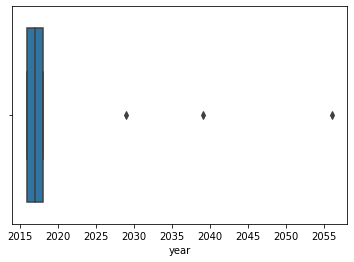

In [ ]:
# in the years column
check_outlier('year')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


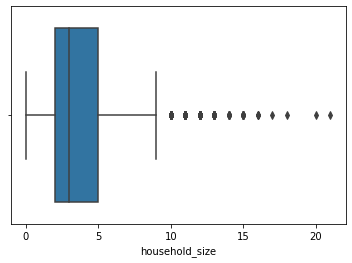

In [ ]:
# in the household size column
check_outlier('household_size')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


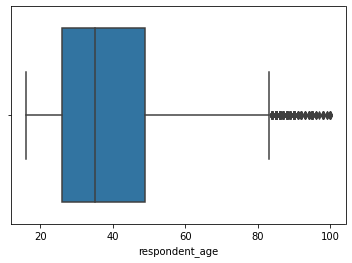

In [ ]:
## in the respondent's age column
check_outlier('respondent_age')

In [ ]:
#Function to remove outliers using z-score
def remove_outliers(data, col):
    col_upper = data[col].mean() + 3*data[col].std()
    col_lower = data[col].mean() - 3*data[col].std()
    df = data[(data[col]< col_upper) & (data[col]> col_lower)]
    return df

#remove(dataset, 'Income')
clmns = ['year', 'household_size', 'Respondent Age']
for c in clmns:
  new_df = remove_outliers(df, c)
  new_df

In [ ]:
df_year = remove_outliers(df_2,'year')
df_year.head()

,country,year,unique_ID,bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df_household = remove_outliers(df_year,'household_size')
df_household.head()

,country,year,unique_ID,bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df_age = remove_outliers(df_household,'respondent_age')
df_age.head()

,country,year,unique_ID,bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# checking for missing data
#renaming our dataframe
df_2 =df_age
# getting the sum of missing values in each column
df_2.isnull().sum()

country                   14
year                       0
unique_ID                  0
bank_account              33
type_of_location          15
cellphone_access          11
household_size             0
respondent_age             0
gender_of_respondent      26
relationship_with_head     0
marital_status            27
level_of_education        25
type_of_job               26
dtype: int64

In [ ]:
# dropping the null values since they are very few and will not affect our data
final_df= df_2.dropna()
final_df.shape

(23055, 13)

In [ ]:
# duplicated data
final_df.duplicated().sum()

# There are no duplicates in our data

0

# 5. Exploratory Analysis

## UNIVARIATE ANALYSIS

## Central Tendency

> 



### Mean

In [ ]:
#Function to compute the mean
def mean_value(dataframe, column):
  return dataframe[column].mean()

In [ ]:
#Mean household size
mean_value(final_df,'household_size')

3.625851225330731

In [ ]:
# mean respondent's age
mean_value(final_df,'respondent_age')

38.60693992626328

### Mode

In [ ]:
# Function to compute the mode
def mode_value(dataframe, column):
  return dataframe[column].mode()

In [ ]:
# mode of household size
mode_value(final_df,'household_size')

0    2.0
dtype: float64

In [ ]:
# mode for respondent age
mode_value(final_df,'respondent_age')

0    30.0
dtype: float64

### Median

In [ ]:
# Function to compute median
def median_value(dataframe, column):
  return dataframe[column].median()

In [ ]:
# median for the household size
median_value(final_df,'household_size')

3.0

In [ ]:
# median for respondent's age
median_value(final_df, 'respondent_age')

35.0

## Dispersion 

### Variance

In [ ]:
 print(final_df['household_size'].var())
print(final_df['respondent_age'].var())

4.629677828996715
261.66782725823055


### Standard Deviation

In [ ]:
print(final_df['household_size'].std())
print(final_df['respondent_age'].std())

2.151668615051285
16.176149951648895


### Skewness

In [ ]:
#skewness
print(final_df['household_size'].skew())
print(final_df['respondent_age'].skew())


0.6915337322328662
0.7835572156715616


### Kurtosis

In [ ]:
#kurtosis
print(final_df['household_size'].kurt())
print(final_df['respondent_age'].kurt())

-0.24797264775279837
-0.10836419666389396


# BIVARIATE ANALYSIS

### Pearson Coefficient

In [ ]:
# The numerical variables in this dataset are 'year', 'household size' and 'respondent age'. 
# Calculating the pearson coefficient between the year and household_size 
pearson_coeff = final_df["year"].corr(final_df["household_size"], method="pearson") 
print(pearson_coeff)

# Pearson coefficient between the year and respondent age
pearson_coeff = final_df["year"].corr(final_df["respondent_age"], method="pearson") 
print(pearson_coeff)


-0.08354815024162184
-0.02160356137525902


### Plotting a line graph

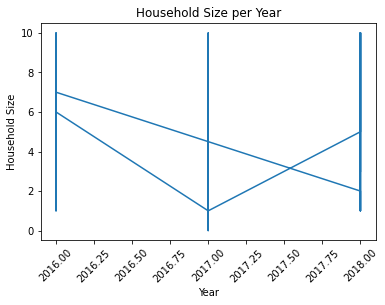

In [ ]:
# Plotting our line graph

years    = final_df['year']
household_size = final_df['household_size']

# Plotting our line graph
plt.plot(years, household_size)
plt.xticks(rotation = 45)

# Giving a title to our line graph
plt.title("Household Size per Year")

# Labelling the y-axis
plt.ylabel('Household Size')

# Labelling the x-axis
plt.xlabel('Year')

# Displaying our graph
plt.show()

### Plotting the bivariate summaries

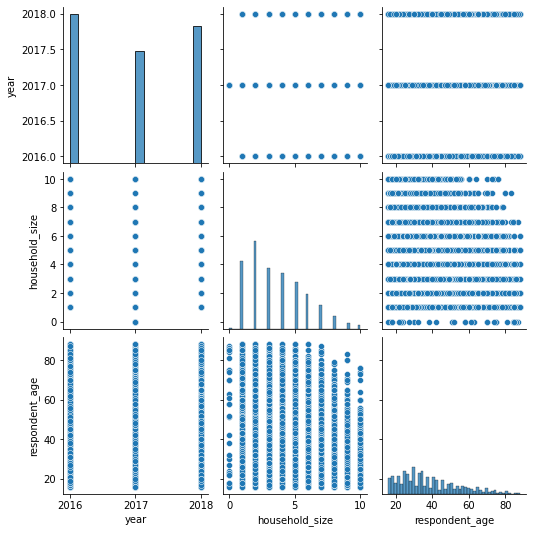

In [ ]:
# bivariate summaries
sns.pairplot(final_df)
plt.show()

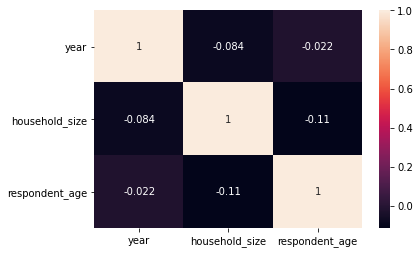

In [ ]:
# Plotting a heatmap
sns.heatmap(final_df.corr(),annot=True)
plt.show()

# MULTIVARIATE ANALYSIS

In [ ]:
final_df.head()

,country,year,unique_ID,bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## Reduction Analysis

In [ ]:
# Performimg PCA on our data
# Preprocessing
X = final_df.iloc[:, 6:7].values
y = final_df.iloc[:, 3].values


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Normalizating the feature set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train)
print(X_test)

[[-1.22419804]
 [ 1.09322423]
 [-0.29722913]
 ...
 [-0.29722913]
 [ 0.16625532]
 [-1.22419804]]
[[ 0.62973977]
 [-0.76071359]
 [ 1.09322423]
 ...
 [ 0.16625532]
 [ 2.94716204]
 [ 1.09322423]]


In [ ]:
# Getting the explained variance 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.])

In [ ]:
# using 1 principal component
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train

array([[-2.64129256],
       [ 2.35870744],
       [-0.64129256],
       ...,
       [-0.64129256],
       [ 0.35870744],
       [-2.64129256]])

In [ ]:
# Training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
#Performance evaluation using the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

#the accuracy level of our model is 85%.

[[3948    0]
 [ 663    0]]
Accuracy 0.8562134027325959


Linear Discriminant Analysis

In [ ]:
# Pre-processing procedure
X = final_df.iloc[:, 6:7].values
y = final_df.iloc[:, 3].values

In [ ]:
#Dividing data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
print(X_train)
print(X_test)

[[-1.22437406]
 [ 1.09338142]
 [-0.29727187]
 ...
 [-0.29727187]
 [ 0.16627923]
 [-1.22437406]]
[[ 0.62983032]
 [-0.76082296]
 [ 1.09338142]
 ...
 [ 0.16627923]
 [ 2.9475858 ]
 [ 1.09338142]]


In [ ]:
#Training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
# Evaluating performance using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# the accuracy level of our model is 85%

[[3948    0]
 [ 663    0]]
Accuracy0.8562134027325959
